In [1]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(context='notebook', font_scale=1.2)

In [2]:
trips = pd.read_csv('data/trip.csv')
weather = pd.read_csv('data/weather.csv')
stations = pd.read_csv('data/station.csv')


In [3]:
#status = pd.read_csv('data/status.csv', low_memory= False)

In [4]:
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [5]:
trips.describe()

,id,duration,start_station_id,end_station_id,bike_id
count,669959.000000,6.699590e+05,669959.000000,669959.000000,669959.000000
mean,460382.009899,1.107950e+03,57.851876,57.837438,427.587620
std,264584.458487,2.225544e+04,17.112474,17.200142,153.450988
min,4069.000000,6.000000e+01,2.000000,2.000000,9.000000
25%,231082.500000,3.440000e+02,50.000000,50.000000,334.000000
50%,459274.000000,5.170000e+02,62.000000,62.000000,440.000000
75%,692601.000000,7.550000e+02,70.000000,70.000000,546.000000
max,913460.000000,1.727040e+07,84.000000,84.000000,878.000000


In [6]:
trips.duration.describe()

count    6.699590e+05
mean     1.107950e+03
std      2.225544e+04
min      6.000000e+01
25%      3.440000e+02
50%      5.170000e+02
75%      7.550000e+02
max      1.727040e+07
Name: duration, dtype: float64

In [7]:
# Paso duration a minutos.
trips.duration /= 60

In [8]:
trips.duration.describe()

count    669959.000000
mean         18.465831
std         370.923950
min           1.000000
25%           5.733333
50%           8.616667
75%          12.583333
max      287840.000000
Name: duration, dtype: float64

In [9]:
ochoHoras = 60 * 8
trips[trips.duration > ochoHoras].count()

id                    1886
duration              1886
start_date            1886
start_station_name    1886
start_station_id      1886
end_date              1886
end_station_name      1886
end_station_id        1886
bike_id               1886
subscription_type     1886
zip_code              1775
dtype: int64

In [10]:
trips.start_date = pd.to_datetime(trips.start_date, format='%m/%d/%Y %H:%M')
trips.end_date = pd.to_datetime(trips.end_date, format='%m/%d/%Y %H:%M')
trips["date"] = trips.start_date.dt.date
trips["startYear"] = trips.start_date.dt.year
trips["startMonth"] = trips.start_date.dt.month
trips["startWeekday"]  = trips.start_date.dt.weekday_name
trips["startWeekdayId"]  = trips.start_date.dt.weekday
trips["startHour"] = trips.start_date.dt.hour
trips["endHour"] = trips.end_date.dt.hour

In [11]:
diasDistintos = trips[trips.start_date.dt.date != trips.end_date.dt.date]

In [12]:
# Cuánta gente se 'robó' bicicletas
# (Consideramos robada cuando tardó + de 1 semana en devolver)
unaSemana = 60 * 24 * 7
ladrones = diasDistintos[diasDistintos.duration > unaSemana]

In [13]:
# No se roban tantas bicis.
ladrones.groupby('startYear').count()['id']

startYear
2013    2
2014    5
2015    6
Name: id, dtype: int64

In [14]:
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date,startYear,startMonth,startWeekday,startWeekdayId,startHour,endHour
0,4576,1.050000,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,2013-08-29,2013,8,Thursday,3,14,14
1,4607,1.166667,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,2013-08-29,2013,8,Thursday,3,14,14
2,4130,1.183333,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,2013-08-29,2013,8,Thursday,3,10,10
3,4251,1.283333,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,2013-08-29,2013,8,Thursday,3,11,11
4,4299,1.383333,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,2013-08-29,2013,8,Thursday,3,12,12


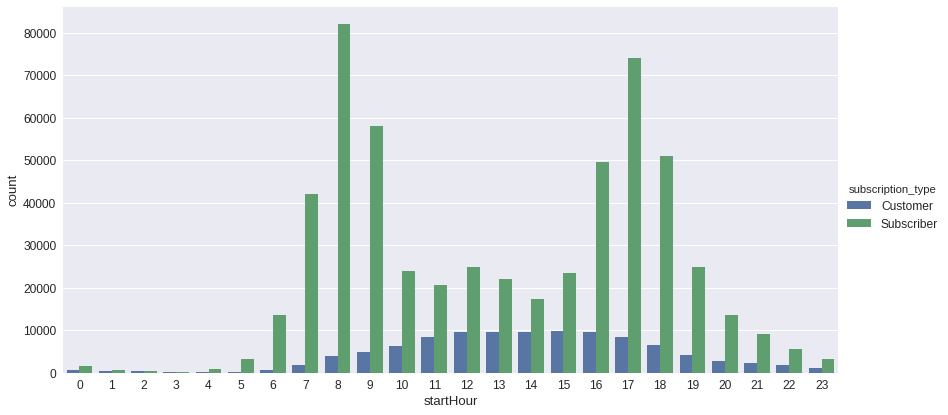

In [15]:
# Separamos los viajes por tipo de subscripción, se puede ver que los 'Subscriber' lo usan para ir a trabajar
# Mientras que los 'Customer' parecen tener una distribución de campana.
tripsBySubscription = trips.groupby(['subscription_type', 'startHour'])['id'].count().reset_index().rename(columns={'id':'count'})
sns.factorplot(
    data=tripsBySubscription, x='startHour', y='count', kind='bar', hue='subscription_type', size=6, aspect=2
)

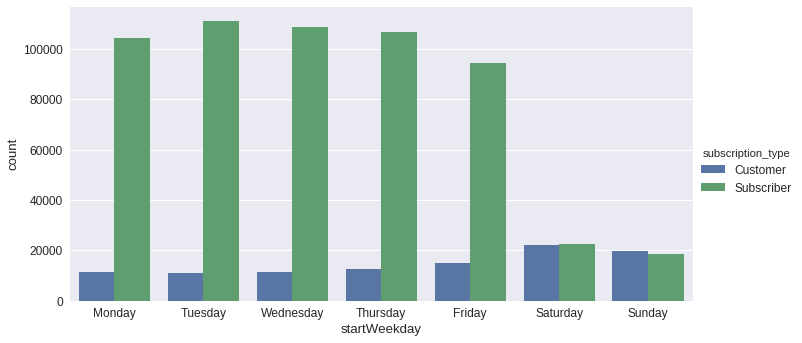

In [16]:
# Más indicios de que los Subscriber usan las bicis para trabajar, mientras que los Customer parecen ser 'turistas'
# ya que las utilizan más durante los sábados y domingos.
tripsByDay = trips.groupby(
    ['subscription_type', 'startWeekday', 'startWeekdayId']
)['id'].count().reset_index().sort_values('startWeekdayId').rename(columns={'id': 'count'})

sns.factorplot(
    data=tripsByDay, x='startWeekday', y='count', hue='subscription_type', kind='bar', size=5, aspect=2
)

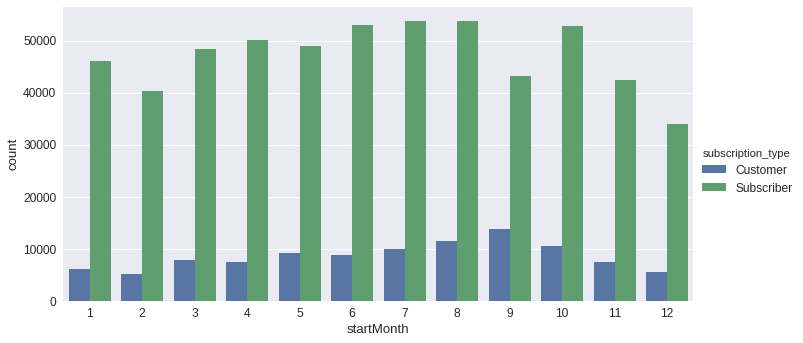

In [17]:
# Los meses de verano tienen un poco más de uso que los demás, tanto para los Customer como para los Subscriber
tripsByMonth = trips.groupby(
    ['subscription_type', 'startMonth']
)['id'].count().reset_index().sort_values('startMonth').rename(columns={'id': 'count'})

sns.factorplot(
    data=tripsByMonth, x='startMonth', y='count', hue='subscription_type', kind='bar', size=5, aspect=2
)

In [18]:
print (trips.columns)
alquiladasPorFecha = pd.DataFrame(trips.groupby('date').count()['id'])

alquiladasPorFecha['date'] = alquiladasPorFecha.index
alquiladasPorFecha.reset_index(drop = True, inplace = True)
alquiladasPorFecha.rename(columns={'id': 'alquiladas'}, inplace=True)
alquiladasPorFecha.date = pd.to_datetime(alquiladasPorFecha.date)
alquiladasPorFecha

Index(['id', 'duration', 'start_date', 'start_station_name',
       'start_station_id', 'end_date', 'end_station_name', 'end_station_id',
       'bike_id', 'subscription_type', 'zip_code', 'date', 'startYear',
       'startMonth', 'startWeekday', 'startWeekdayId', 'startHour', 'endHour'],
      dtype='object')


,alquiladas,date
0,748,2013-08-29
1,714,2013-08-30
2,640,2013-08-31
3,706,2013-09-01
4,661,2013-09-02
5,597,2013-09-03
6,606,2013-09-04
7,677,2013-09-05
8,814,2013-09-06
9,796,2013-09-07


In [19]:
#sns.factorplot(data=alquiladasPorFecha, x='date', y='alquiladas', size=6, aspect=2, kind='bar')

# Miramos Dataframe weather

In [20]:
weather.date = pd.to_datetime(weather.date, format='%m/%d/%Y')
weather['year'] = weather.date.dt.year
weather['month'] = weather.date.dt.month
weather['day'] = weather.date.dt.day
weather['day_of_week'] = weather.date.dt.dayofweek
#weather.drop(['max_sea_level_pressure_inches', 'mean_sea_level_pressure_inches', 'min_sea_level_pressure_inches'],inplace=True, axis=1)
weather.columns

Index(['date', 'max_temperature_f', 'mean_temperature_f', 'min_temperature_f',
       'max_dew_point_f', 'mean_dew_point_f', 'min_dew_point_f',
       'max_humidity', 'mean_humidity', 'min_humidity',
       'max_sea_level_pressure_inches', 'mean_sea_level_pressure_inches',
       'min_sea_level_pressure_inches', 'max_visibility_miles',
       'mean_visibility_miles', 'min_visibility_miles', 'max_wind_Speed_mph',
       'mean_wind_speed_mph', 'max_gust_speed_mph', 'precipitation_inches',
       'cloud_cover', 'events', 'wind_dir_degrees', 'zip_code', 'year',
       'month', 'day', 'day_of_week'],
      dtype='object')

In [21]:
# Hay un ingreso por zip_code para cada fecha

print ("Los zip_codes son: ")
print (weather.zip_code.unique())

weather.groupby('date').count()['zip_code']

Los zip_codes son: 
[94107 94063 94301 94041 95113]


date
2013-08-29    5
2013-08-30    5
2013-08-31    5
2013-09-01    5
2013-09-02    5
2013-09-03    5
2013-09-04    5
2013-09-05    5
2013-09-06    5
2013-09-07    5
2013-09-08    5
2013-09-09    5
2013-09-10    5
2013-09-11    5
2013-09-12    5
2013-09-13    5
2013-09-14    5
2013-09-15    5
2013-09-16    5
2013-09-17    5
2013-09-18    5
2013-09-19    5
2013-09-20    5
2013-09-21    5
2013-09-22    5
2013-09-23    5
2013-09-24    5
2013-09-25    5
2013-09-26    5
2013-09-27    5
             ..
2015-08-02    5
2015-08-03    5
2015-08-04    5
2015-08-05    5
2015-08-06    5
2015-08-07    5
2015-08-08    5
2015-08-09    5
2015-08-10    5
2015-08-11    5
2015-08-12    5
2015-08-13    5
2015-08-14    5
2015-08-15    5
2015-08-16    5
2015-08-17    5
2015-08-18    5
2015-08-19    5
2015-08-20    5
2015-08-21    5
2015-08-22    5
2015-08-23    5
2015-08-24    5
2015-08-25    5
2015-08-26    5
2015-08-27    5
2015-08-28    5
2015-08-29    5
2015-08-30    5
2015-08-31    5
Name: zip_code, dty

In [22]:
# Vemos los datos para cada zip_code
for zc in weather.zip_code.unique():
    print ("zip_code: " + str(zc))
    print (weather[weather.zip_code == zc].isnull().sum())
    print ()

zip_code: 94107
date                                0
max_temperature_f                   0
mean_temperature_f                  0
min_temperature_f                   0
max_dew_point_f                     0
mean_dew_point_f                    0
min_dew_point_f                     0
max_humidity                        0
mean_humidity                       0
min_humidity                        0
max_sea_level_pressure_inches       0
mean_sea_level_pressure_inches      0
min_sea_level_pressure_inches       0
max_visibility_miles                0
mean_visibility_miles               0
min_visibility_miles                0
max_wind_Speed_mph                  0
mean_wind_speed_mph                 0
max_gust_speed_mph                 13
precipitation_inches                0
cloud_cover                         0
events                            574
wind_dir_degrees                    0
zip_code                            0
year                                0
month                             

In [23]:
# Vamos a usar 94107 que es el que tiene los datos más limpios
weather = weather[weather.zip_code == 94107]
weather.drop('zip_code', inplace=True, axis=1)

In [24]:
weather.events.unique()

array([nan, 'Fog', 'Rain', 'Fog-Rain', 'rain', 'Rain-Thunderstorm'], dtype=object)

In [25]:
weather.loc[weather.events == 'rain', 'events'] = "Rain"
weather.loc[weather.events.isnull(), 'events'] = "Normal"

In [26]:
def toCelsius(fahrenheit):
    return (fahrenheit - 32) / 1.8

In [27]:
# Pasamos las temperaturas a farenheit
for column in weather.columns:
    if "_f" in column:
        weather[column] = weather[column].apply(toCelsius)

weather.rename(columns=lambda x: x.replace("_f", "_c"), inplace=True)

In [28]:
# Tienen sentido las temperaturas
weather.max_temperature_c.describe()

count    733.000000
mean      20.222071
std        4.039283
min        8.333333
25%       17.222222
50%       20.000000
75%       22.777778
max       33.888889
Name: max_temperature_c, dtype: float64

In [48]:
def laborables(df):
    calendar = USFederalHolidayCalendar()
    holidays = calendar.holidays(start=df.date.min(), end=df.date.max())
    return df[(~df.date.isin(holidays)) \
            & (df.date.dt.weekday != 5) \
            & (df.date.dt.weekday != 6)]

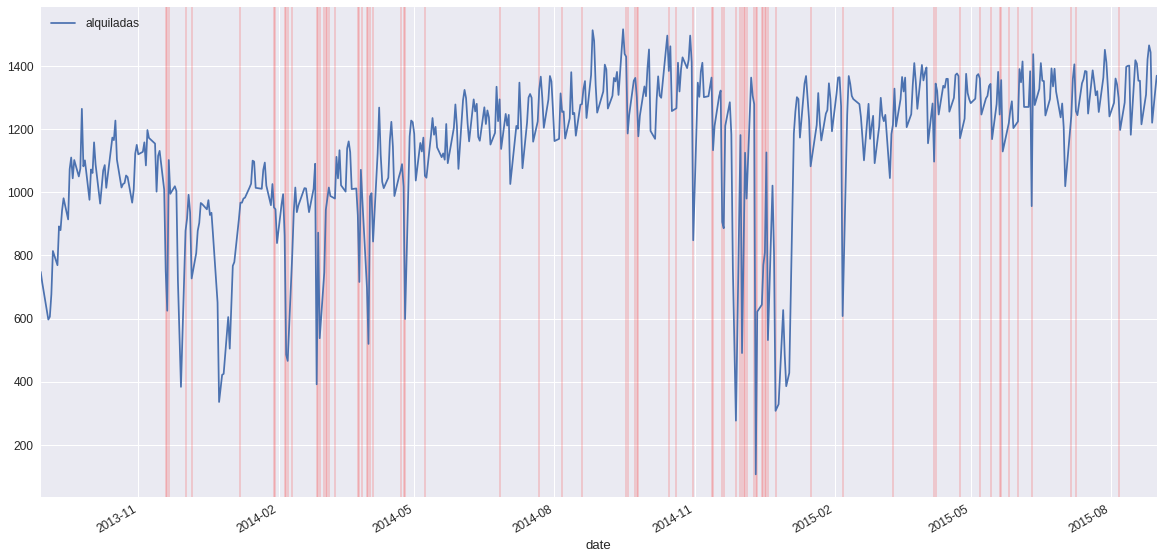

In [103]:
# Relación entre alquiladas y las lluvias
# Se puede ver que en los días de lluvia disminuye el uso de las bicicletas
rainyDays = weather[weather.events.str.contains('Rain')]
rainyDays = laborables(rainyDays)
diasLaborables = laborables(alquiladasPorFecha)
diasLaborables.plot(figsize=(20,10), x='date', y='alquiladas')
for date in rainyDays.date:
    plt.axvspan(date, date, color='red')


In [31]:
diasLaborables[diasLaborables.alquiladas < 400]

,alquiladas,date
92,384,2013-11-29
117,336,2013-12-24
181,392,2014-02-26
456,277,2014-11-28
469,107,2014-12-11
482,308,2014-12-24
484,329,2014-12-26
489,386,2014-12-31


In [32]:
rainyDays

,date,max_temperature_c,mean_temperature_c,min_temperature_c,max_dew_point_c,mean_dew_point_c,min_dew_point_c,max_humidity,mean_humidity,min_humidity,...,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,year,month,day,day_of_week
82,2013-11-19,16.111111,14.444444,12.222222,12.777778,10.000000,7.222222,93.0,80.0,66.0,...,7.0,16.0,0.28,7.0,Rain,131.0,2013,11,19,1
83,2013-11-20,15.000000,12.777778,10.555556,13.333333,11.666667,8.333333,93.0,90.0,86.0,...,7.0,24.0,0.63,7.0,Rain,239.0,2013,11,20,2
84,2013-11-21,16.666667,13.333333,10.000000,9.444444,5.555556,0.000000,93.0,64.0,35.0,...,11.0,39.0,T,5.0,Rain,349.0,2013,11,21,3
95,2013-12-02,16.666667,12.222222,7.777778,12.222222,9.444444,6.666667,96.0,80.0,64.0,...,14.0,38.0,T,5.0,Fog-Rain,277.0,2013,12,2,0
99,2013-12-06,11.666667,7.222222,2.777778,8.888889,2.777778,-0.555556,80.0,65.0,50.0,...,9.0,43.0,0.29,6.0,Rain,180.0,2013,12,6,4
131,2014-01-07,16.111111,12.222222,7.777778,11.111111,7.222222,3.888889,86.0,70.0,53.0,...,4.0,17.0,T,5.0,Rain,304.0,2014,1,7,1
153,2014-01-29,17.222222,15.000000,12.222222,13.888889,12.222222,10.000000,93.0,89.0,84.0,...,8.0,22.0,T,8.0,Rain,282.0,2014,1,29,2
154,2014-01-30,14.444444,12.777778,11.111111,10.555556,8.888889,7.777778,93.0,80.0,67.0,...,14.0,38.0,T,6.0,Rain,267.0,2014,1,30,3
160,2014-02-05,12.777778,9.444444,6.111111,7.777778,5.555556,3.333333,86.0,73.0,59.0,...,7.0,24.0,0.09,6.0,Rain,255.0,2014,2,5,2
161,2014-02-06,11.111111,10.000000,8.888889,11.111111,8.888889,5.555556,100.0,90.0,80.0,...,7.0,23.0,0.64,8.0,Rain,100.0,2014,2,6,3


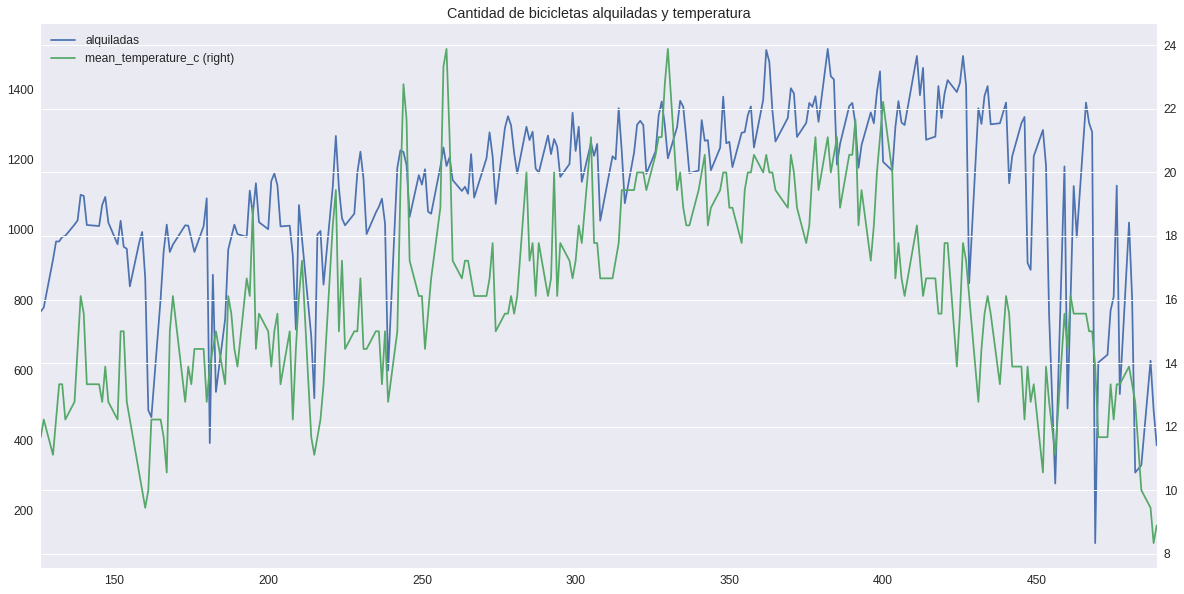

In [89]:
# Veamos si hay relación entre temperatura y cantidad de bicis alquiladas
relacion = alquiladasPorFecha.merge(weather, on='date')
relacion = relacion[['alquiladas', 'date', 'max_temperature_c', 'mean_temperature_c', 'min_temperature_c', 'year', 'month', 'day_of_week']]
# Sacamos los fines de semana
relacion = laborables(relacion)
relacion = relacion[relacion.year == 2014]
#p.plot(figsize=(20,10), x='date', y='alquiladas')
#relacion.mean_temperature_c.plot(secondary_y=True)
relacion.alquiladas.plot(figsize=(20,10), legend=True,title='Cantidad de bicicletas alquiladas y temperatura')
relacion.mean_temperature_c.plot(legend=True, secondary_y=True)



In [68]:
# Nos quedamos con los días laborables
trips['date'] = pd.to_datetime(trips['date'])
diasLaborables = laborables(trips)
byHour = diasLaborables.groupby(['date', 'startHour'])['id'].agg(['count']).sort_index().reset_index()
# Analizamos la temperatura con la que se alquilaron bicicletas durante el día
wl = byHour.merge(weather, on='date')
wl = wl[['date', 'startHour', 'count', 'mean_temperature_c']]
wl['temp_entre'] = pd.cut(wl.mean_temperature_c, [0, 12, 24, 30])

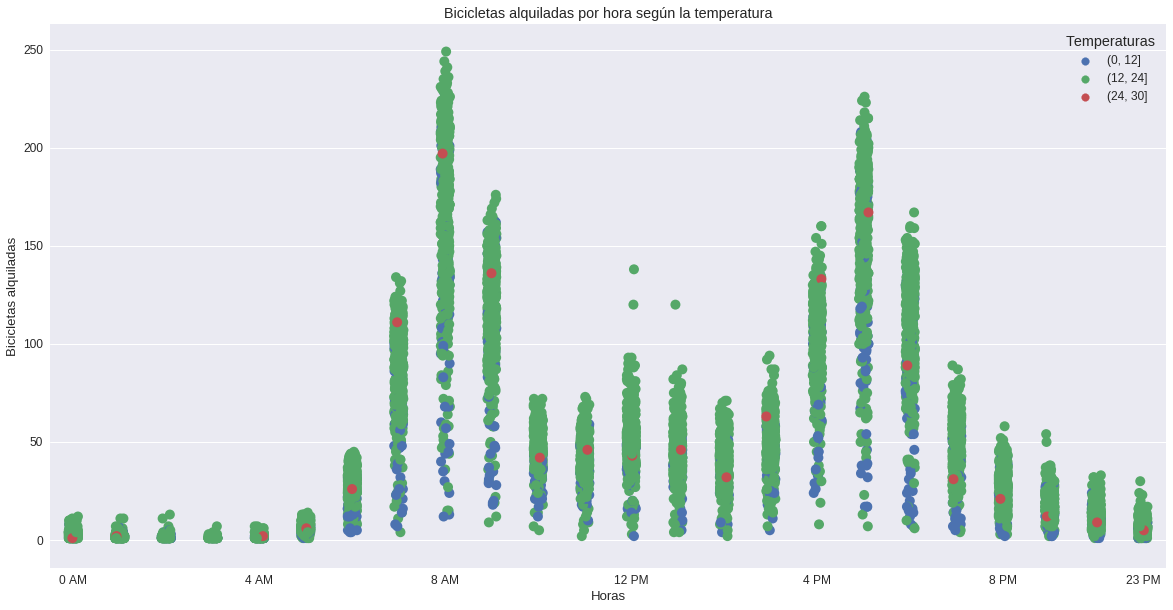

In [86]:
fig = plt.subplots(figsize=(20,10))
ax = sns.stripplot('startHour', 'count', data=wl, hue='temp_entre', jitter=True, size=10)
ax.set(ylabel='Bicicletas alquiladas', xlabel='Horas')
ax.set_xticks([0, 4, 8, 12, 16, 20, 23])
ax.set_xticklabels(['0 AM', '4 AM', '8 AM', '12 PM', '4 PM', '8 PM', '23 PM'])
ax.legend(loc='upper right', title='Temperaturas')
plt.title('Bicicletas alquiladas por hora según la temperatura')


# Station Dataframe

In [35]:
stations.installation_date = pd.to_datetime(stations.installation_date, format='%m/%d/%Y')
stations.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,2013-08-05
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,2013-08-06
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,2013-08-05
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,2013-08-07


In [36]:
# Nos quedamos con los viajes de menos de 6hs.
commonTrips = trips[trips.duration <= 360]

In [37]:
tripsByStation = commonTrips.groupby(['start_station_id', 'end_station_id'])['date'].count().sort_values(ascending=False)
tripsByStation = tripsByStation.to_frame()
tripsByStation.reset_index(inplace=True)
tripsByStation.rename(columns={'date': 'trips'}, inplace=True)

In [38]:
tripsByStation = tripsByStation.merge(stations[['id', 'lat', 'long']], left_on='start_station_id', right_on=['id'])
tripsByStation.drop('id', axis=1, inplace=True)
tripsByStation.rename(columns={'lat': 'lat_start', 'long': 'long_start'}, inplace=True)
tripsByStation = tripsByStation.merge(stations[['id', 'lat', 'long']], left_on='end_station_id', right_on=['id'])
tripsByStation.drop('id', axis=1, inplace=True)
tripsByStation.rename(columns={'lat': 'lat_end', 'long': 'long_end'}, inplace=True)

In [39]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [40]:
tripsByStation['distance'] = tripsByStation.apply(lambda row: haversine(row.long_start, row.lat_start, row.long_end, row.lat_end), axis=1)
tripsByStation.drop(['lat_start', 'lat_end', 'long_start', 'long_end'], inplace=True, axis=1)


In [41]:
tripsByStation.sort_values(by='trips', ascending=False, inplace=True)
tripsByStation

,start_station_id,end_station_id,trips,distance
0,69,65,6210,0.886266
916,50,60,6146,1.310345
1162,65,70,5039,0.900919
143,61,50,4838,1.688445
566,50,61,4355,1.688445
320,60,74,4267,1.412518
1165,51,70,3962,1.692168
571,74,61,3901,1.556926
147,70,50,3616,2.089750
218,64,77,3609,1.083589


In [42]:
trips = trips.merge(
    tripsByStation[['start_station_id', 'end_station_id', 'distance']], 
    on=['start_station_id', 'end_station_id']
    )

In [43]:
distanceByDate = trips.groupby('date')['distance'].agg(['sum', 'count', 'mean']).reset_index()
distanceByDate.date = pd.to_datetime(distanceByDate.date)
distanceByDate.dtypes

date     datetime64[ns]
sum             float64
count             int64
mean            float64
dtype: object

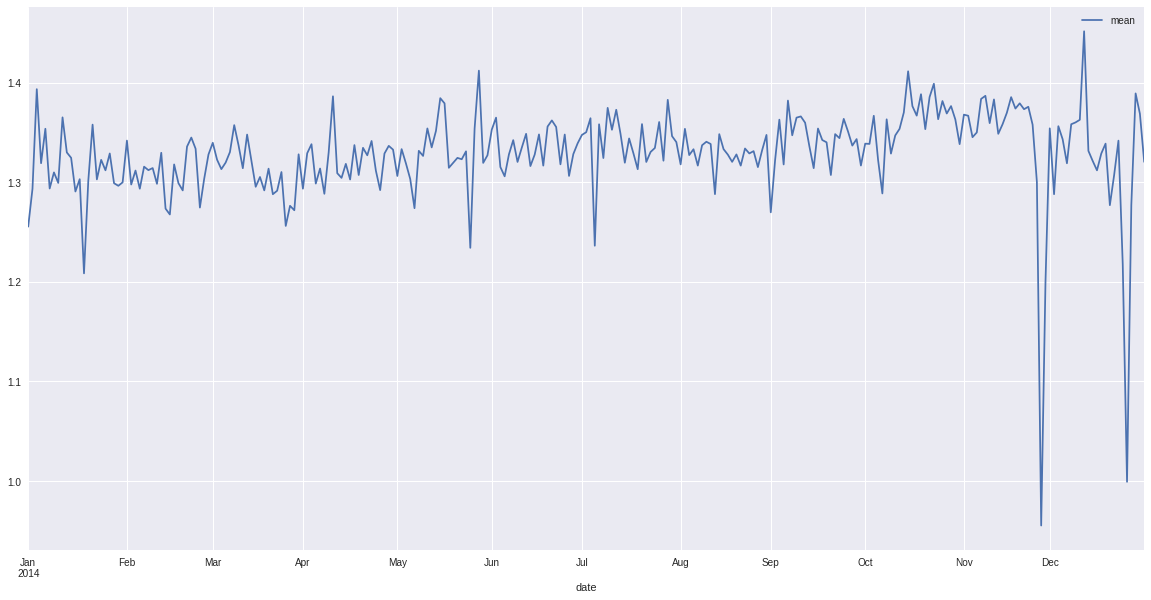

In [44]:
# Promedio de distancias recorridas en los días de semana del 2014
distanceByDate[(distanceByDate.date.dt.year == 2014)   \
               & (distanceByDate.date.dt.weekday != 5) \
               & (distanceByDate.date.dt.weekday != 6)]\
    .plot(x='date', y='mean', figsize=(20,10))

In [45]:
trips['velocity'] = trips.apply(lambda row: round(row.distance * 1000 / (row.duration * 60), 2), axis=1)

In [46]:
trips.sort_values(by='velocity', ascending=False)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date,startYear,startMonth,startWeekday,startWeekdayId,startHour,endHour,distance,velocity
636771,42493,3.933333,2013-10-02 08:27:00,Redwood City Caltrain Station,22,2013-10-02 08:31:00,Civic Center BART (7th at Market),72,232,Subscriber,94105,2013-10-02,2013,10,Wednesday,2,8,8,36.414397,154.30
635094,265581,1.100000,2014-04-29 19:05:00,Broadway at Main,25,2014-04-29 19:06:00,Redwood City Medical Center,26,653,Subscriber,94105,2014-04-29,2014,4,Tuesday,1,19,19,1.801097,27.29
5426,299468,1.233333,2014-05-27 12:46:00,Redwood City Medical Center,26,2014-05-27 12:47:00,Broadway at Main,25,228,Subscriber,94105,2014-05-27,2014,5,Tuesday,1,12,12,1.801097,24.34
635091,136596,1.283333,2013-12-27 14:24:00,Broadway at Main,25,2013-12-27 14:25:00,Redwood City Medical Center,26,13,Subscriber,94041,2013-12-27,2013,12,Friday,4,14,14,1.801097,23.39
635093,320128,1.416667,2014-06-11 13:28:00,Broadway at Main,25,2014-06-11 13:30:00,Redwood City Medical Center,26,228,Subscriber,94105,2014-06-11,2014,6,Wednesday,2,13,13,1.801097,21.19
5423,136712,1.450000,2013-12-27 16:57:00,Redwood City Medical Center,26,2013-12-27 16:58:00,Broadway at Main,25,13,Subscriber,94041,2013-12-27,2013,12,Friday,4,16,16,1.801097,20.70
635092,140738,1.466667,2014-01-02 16:33:00,Broadway at Main,25,2014-01-02 16:34:00,Redwood City Medical Center,26,13,Subscriber,94041,2014-01-02,2014,1,Thursday,3,16,16,1.801097,20.47
83939,829206,1.000000,2015-06-30 20:37:00,Post at Kearny,47,2015-06-30 20:38:00,2nd at South Park,64,410,Subscriber,94107,2015-06-30,2015,6,Tuesday,1,20,20,1.201734,20.03
5422,136237,1.516667,2013-12-26 18:42:00,Redwood City Medical Center,26,2013-12-26 18:43:00,Broadway at Main,25,236,Subscriber,94041,2013-12-26,2013,12,Thursday,3,18,18,1.801097,19.79
105298,848055,1.300000,2015-07-15 16:57:00,Townsend at 7th,65,2015-07-15 16:58:00,2nd at South Park,64,582,Subscriber,94107,2015-07-15,2015,7,Wednesday,2,16,16,1.523307,19.53


In [47]:
# Vamos a quedarnos con valores 'normales': 
# Las velocidad (Un ciclista profesional llega a 11 m/s): 
# eliminando los mayores a 8 sacamos menos del 0.5% de los datos.
# Duration, nos quedamos con las <= 360 (6 hs)
# Distancias menores a 6km
trips.velocity.quantile(0.995)
trips = trips[trips.velocity < 8]
trips.duration.quantile(0.995)
trips = trips[trips.duration <= 360]
trips.distance.quantile(0.995)
trips = trips[trips.distance < 6]

In [48]:
# Cuáles fueron las bicicletas más usadas (en cantidad y en distancia)
mostUsed = trips.groupby('bike_id')['distance']\
    .agg(['sum', 'count', 'mean'])\
    .reset_index()

mostUsed.sort_values(by='sum', ascending=False).head(10)
mostUsed.sort_values(by='count', ascending=False).head(10)


,bike_id,sum,count,mean
370,392,2781.599737,2056,1.352918
467,489,2677.286201,1970,1.359029
536,558,2672.789964,1946,1.373479
246,267,2592.256853,1943,1.334152
609,631,2616.257612,1939,1.349282
496,518,2663.477057,1931,1.379325
570,592,2633.244367,1928,1.365791
510,532,2618.973095,1923,1.361920
346,368,2628.933316,1921,1.368523
518,540,2601.067031,1918,1.356135


In [75]:
# Vamos a ver la velocidad promedio de los Customer vs Subscriber
trips.groupby('subscription_type')['velocity'].mean()

subscription_type
Customer      1.340013
Subscriber    2.756207
Name: velocity, dtype: float64

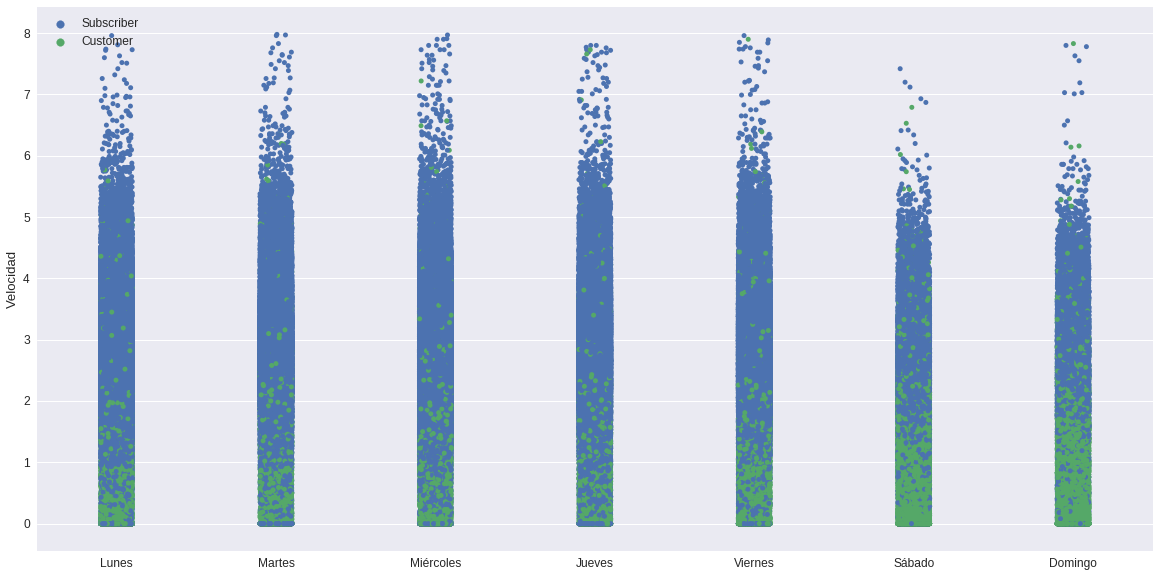

In [74]:
fig = plt.subplots(figsize=(20,10))
ax = sns.stripplot('startWeekdayId', 'velocity', data=trips, hue='subscription_type', jitter=True)
ax.set_xticklabels(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
ax.set(ylabel='Velocidad (m/s)', xlabel='')
ax.legend(loc='upper left')